# Header

In [1]:
import numpy as np
import healpy as hp
import os, sys
from astropy.io import fits
import healpy as hp

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec

nside = 2048
lmax = 2048
ll = np.arange(0,lmax,1)
scale_ps = ll*(ll+1)/(2*np.pi)

psl = r'$\frac{l(l+1)}{2\pi}C_l \/ [\mu K^2]$'

# Choose your dataset

In [3]:
from lerepi.config.cmbs4.data import data_08d as sims_if
sims = sims_if.ILC_May2022('00')

In [4]:
def bandpass_alms(alms, lmin, lmax=None):
    """
    lmin: minimum multipole to keep in alms
    lmax: maximimum multipole to keep in alms
    """
    
    if len(alms) == 3:
        out = np.zeros(alms.shape, dtype=complex)
        for idx, _alms in enumerate(alms):
            out[idx] = bandpass_alms(_alms, lmin, lmax=lmax)
        return out
    
    lmax_in_alms = hp.Alm.getlmax(len(alms))
    if lmax is None:
        lmax = lmax_in_alms
    else:
        assert isinstance(lmax, int), "lmax should be int: {}".format(lmax)
        assert lmax <= lmax_in_alms, "lmax exceeds lmax in alms: {} > {}".format(lmax, lmax_in_alms)
    
    fl = np.zeros(lmax_in_alms + 1, dtype=float)
    fl[lmin:lmax+1] = 1
    
    return hp.almxfl(alms, fl)

In [5]:
lonra = [0,60]
latra = [-60, -20]

In [60]:
from plancklens.utils import alm2rlm, rlm2alm, clhash
from lenscarf.iterators.statics import rec
import os
dset = '08d_00_r5_MF100_OBD200'
plm = rec.load_plms('/global/cscratch1/sd/sebibel/cmbs4/'+dset+'/p_p_sim0000', [0,1,2,3,4,5,5,6])

Text(0.5, 1.0, 'Lensing potential')

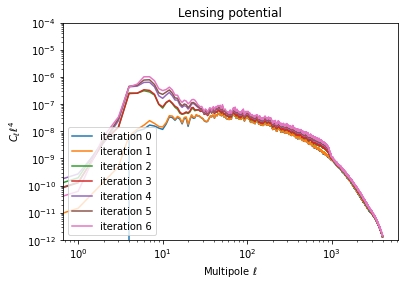

In [61]:
for pi, p in enumerate(plm):
    plt.plot(np.arange(4001)**4*hp.alm2cl(p), label='iteration {}'.format(pi))
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylim(1e-12,1e-4)
plt.xlabel('Multipole $\ell$')
plt.ylabel('$C_{\ell}\ell^4$')
plt.title('Lensing potential')

In [62]:
# pmaps = [hp.alm2map(p, nside=2048) for p in plm]
pmaps_bp = [hp.alm2map(bandpass_alms(p,30,200), nside=2048) for p in plm]
# pmaps_bp_low = [hp.alm2map(bandpass_alms(p,2,20), nside=2048) for p in plm]

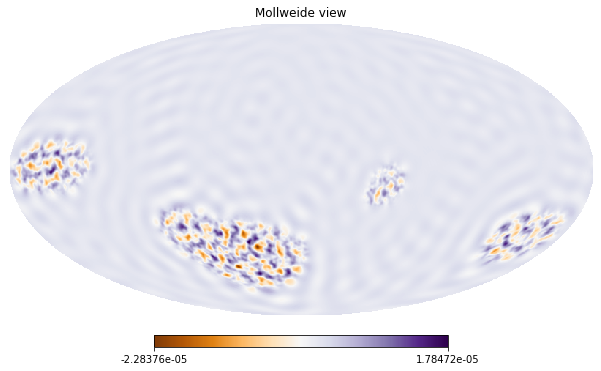

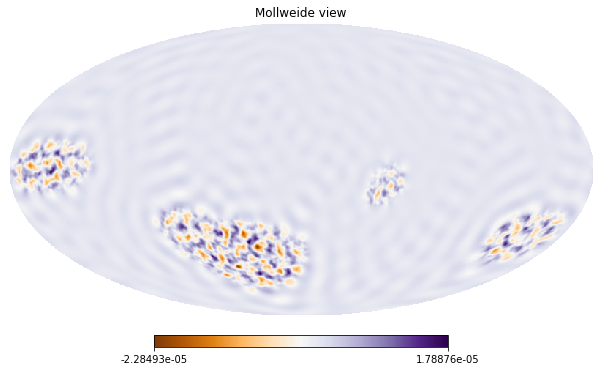

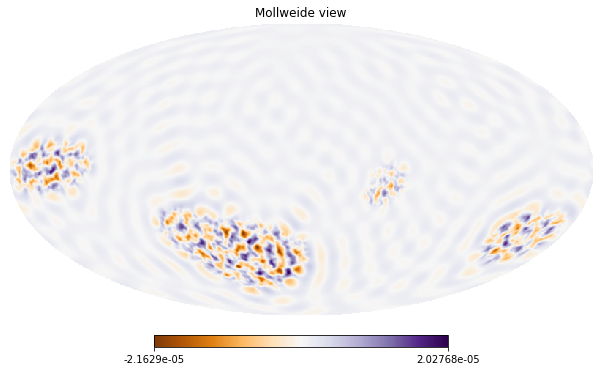

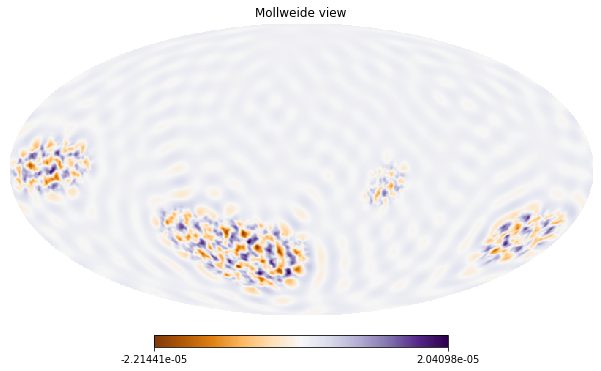

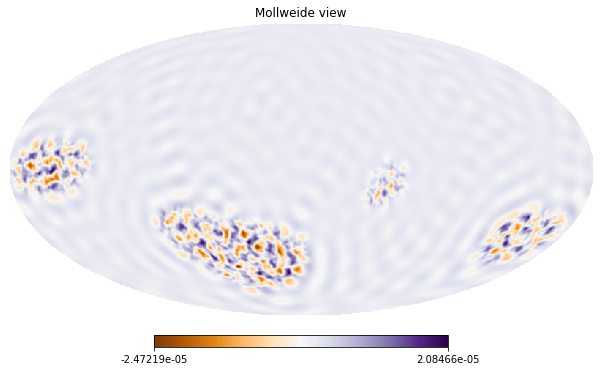

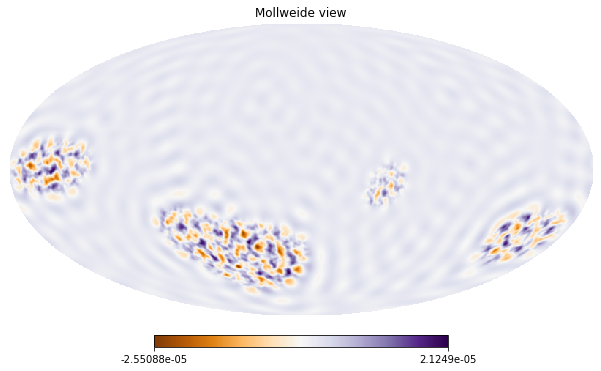

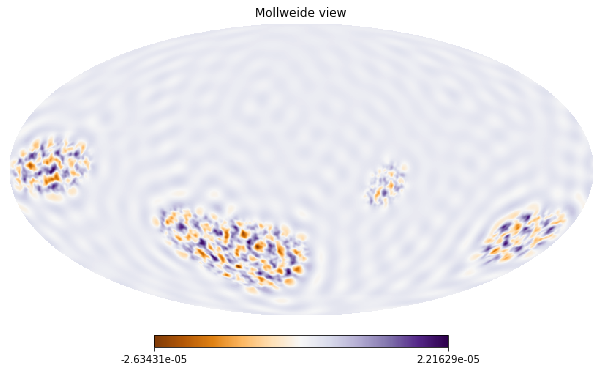

In [64]:
for pmi, pm in enumerate(pmaps_bp):
    # hp.cartview(pm, lonra=lonra, latra=latra, cmap='PuOr')
    hp.mollview(pm, cmap='PuOr')
    plt.savefig('/global/homes/s/sebibel/notebooks/cmbs4/plots/08d/'+dset+'_Phimap_{}.pdf'.format(pmi), dpi=800)

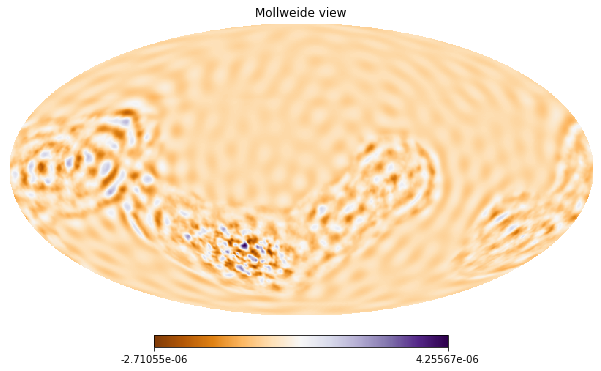

In [39]:
hp.mollview(pmaps_bp[1]-pmaps_bp[0], cmap='PuOr')

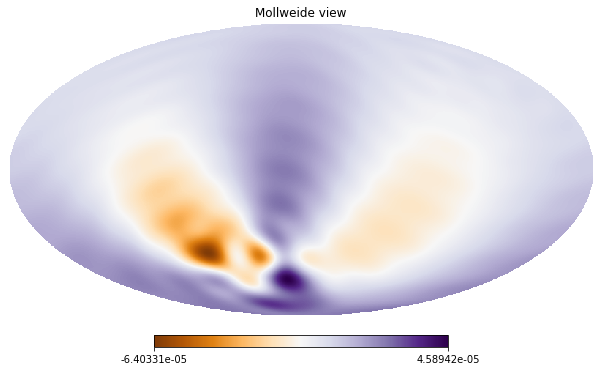

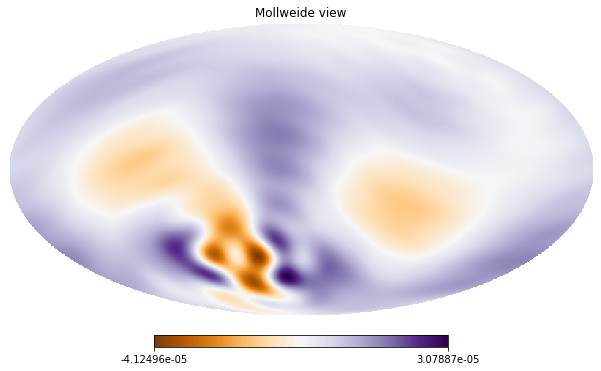

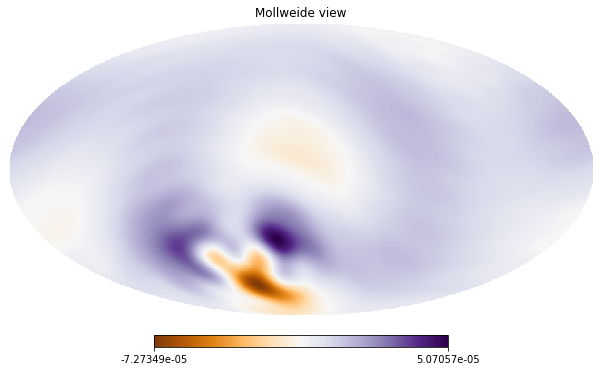

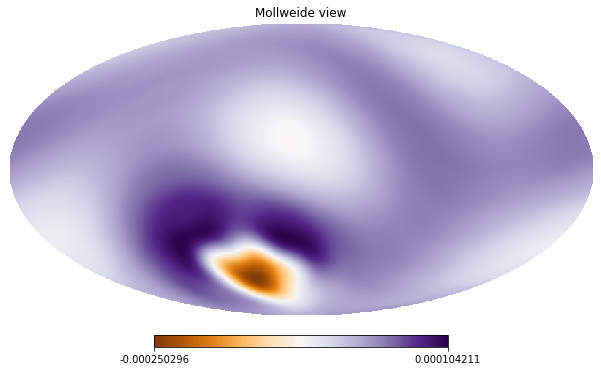

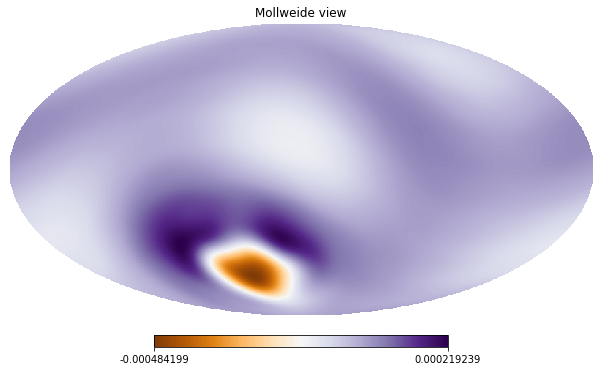

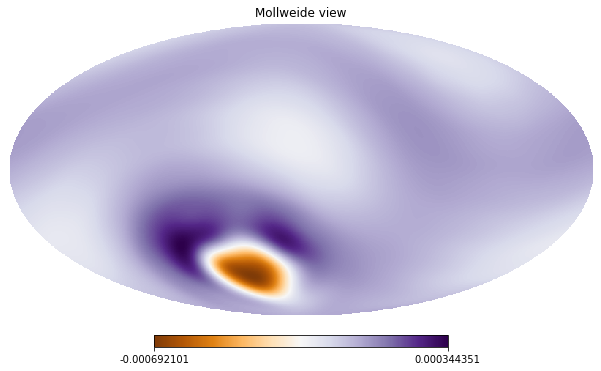

In [39]:
for pmi, (pm, pm_bp) in enumerate(zip(pmaps, pmaps_bp_low)):
    # hp.mollview(pm*np.where(sc.rhits<0.01,0,1), cmap='PuOr')
    hp.mollview(pm, fig=pmi, cmap='PuOr', alpha=0.5*np.ones_like(pm))
    hp.mollview(pm_bp, fig=pmi, cmap='PuOr')#, rot=[0,90,0])#alpha=0.5*np.ones_like(pm))

# Check deflection field

# Load $E^{WF}$s

In [57]:
simid = 0
ewf = parfile.ivfs.get_sim_emliklm(simid)
# ivfs_OBD.get_sim_bmliklm(simid)

In [58]:
ewf.shape

(4504501,)

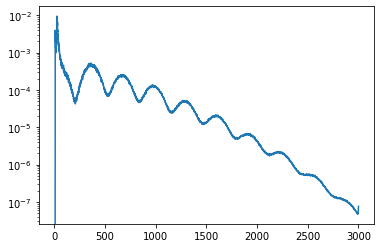

In [59]:
plt.plot(hp.alm2cl(ewf))
plt.yscale('log')

# Check ninv_p

# Check mf

In [28]:
mf = np.load('/global/cscratch1/sd/sebibel/cmbs4/08d_00_r100_MF100_OBD200_masknormalised_dmb/p_p_sim0000/mf.npy')

Text(0.5, 1.0, 'Meanfield')

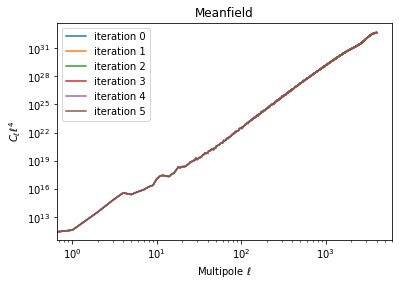

In [34]:
plt.plot(np.arange(4001)**4*hp.alm2cl(mf), label='iteration {}'.format(pi))
plt.yscale('log')
plt.xscale('log')
plt.legend()
# plt.ylim(1e-12,1e-4)
plt.xlabel('Multipole $\ell$')
plt.ylabel('$C_{\ell}\ell^4$')
plt.title('Meanfield')

In [29]:
# mf_map = hp.alm2map(mf, nside=2048)
mf_map_bp = hp.alm2map(bandpass_alms(mf,2,200), nside=2048)

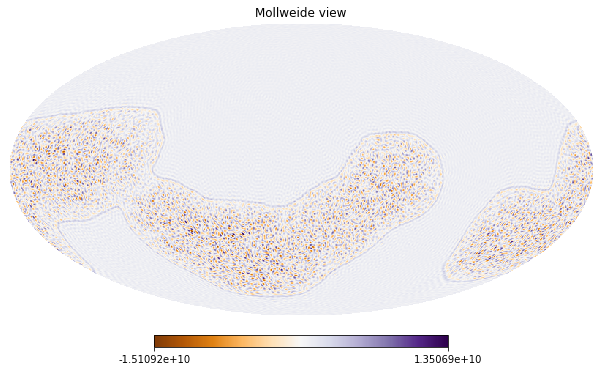

In [32]:
# hp.mollview(mf_map, norm='hist')
hp.mollview(mf_map_bp, cmap='PuOr')

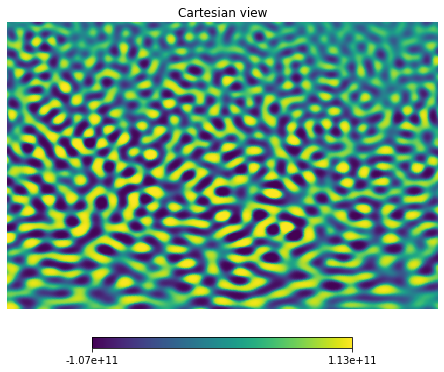

In [68]:
hp.cartview(mf_map_bp, norm='hist', lonra=lonra, latra=latra)

In [71]:
mf_map_bp2 = hp.alm2map(bandpass_alms(mf,150,200), nside=2048)

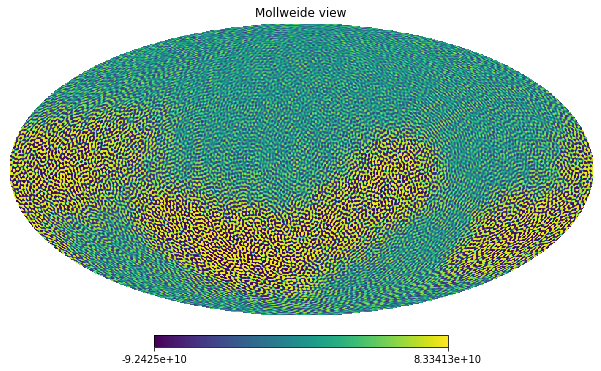

In [72]:
hp.mollview(mf_map_bp2, norm='hist')

(0.0, 200.0)

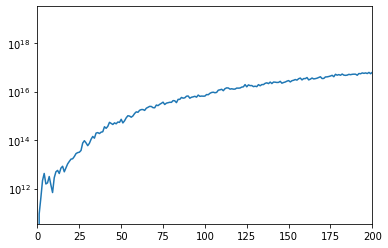

In [80]:
plt.plot(hp.alm2cl(mf))
plt.yscale('log')
plt.xlim(0,200)